In [115]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import json
import numpy as np

# Plot detections

In [116]:
# Set the path to the YOLO model weights, confidence threshold for detection, and input image file.
MODEL = 'weights.pt'
CONF = 0.532
FILE = '../data/detection/train/images/1692243677862.jpg'

In [117]:
# Load the YOLO model with the specified weights.
model = YOLO(MODEL)

# Read the input image using OpenCV (loaded in BGR format).
image = cv2.imread(FILE)

# Perform inference on the image and generate a visualization of the detections.
plot = model(image, conf=CONF, save=False)[0].plot()


0: 640x480 3 plasma cells, 1 non-plasma cell, 4.1ms
Speed: 1.9ms preprocess, 4.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


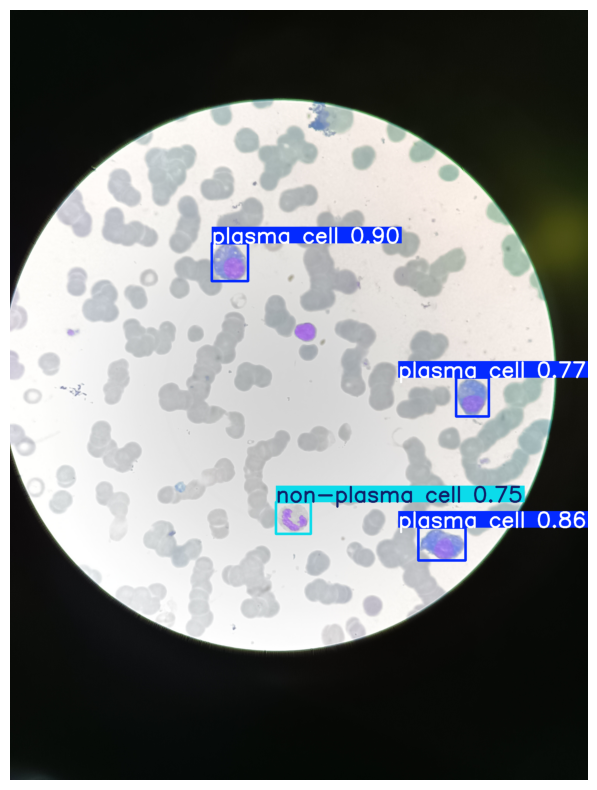

In [118]:
# Display the image with detections using Matplotlib.
plt.figure(figsize=(10, 10)) # Set the display size.
plt.imshow(plot[:,:,::-1]) # Convert BGR to RGB for correct color representation.
plt.axis('off') # Hide axis for a cleaner view.
plt.show()

# Plot segmented cell

In [119]:
FILE = '../data/segmentation/plasma cells/images/1692243677854_p_0.jpg'

In [120]:
# Load the input image.
image = cv2.imread(FILE)

# Derive the corresponding mask file path from the image file path.
mask_file = FILE.replace('images', 'masks').replace('.jpg', '.json')

# Load the mask data from the JSON file.
with open(mask_file, "r") as f:
    mask_data = json.load(f)

In [121]:
# Initialize a blank mask with the same dimensions as the input image.
mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Draw polygons from the mask data onto the blank mask.
for shape in mask_data["shapes"]:
    if shape["shape_type"] == "polygon":
        points = np.array(shape["points"], dtype=np.int32)
        cv2.fillPoly(mask, [points], 1)

# Apply the mask to the image (retain only the masked regions).
plot = mask[:, :, None] * image

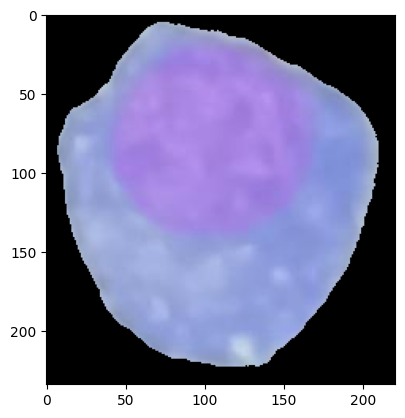

In [122]:
# Display the masked image using Matplotlib.
plt.imshow(plot[:,:,::-1]) # Convert BGR to RGB for correct visualization.
plt.show()